# Tugas Praktikum Minggu 10
### Nicholas Juan Kalvin P. | 162012133068
<hr>



# Image Processing and Unsupervised Learning

## Tugas Praktikum:
<ol>
    <li> Gunakan dataset fashion mnist dari library keras dan berikan penjelasan mengenai dataset tersebut. </li>
    <li> Lakukan  transformasi  fitur  dengan  menggunakan  PCA  dan  berikan  alasan  pemilihan jumlah komponen PCA. </li>
    <li>Bandingkan citra asli dengan citra yang sudah ditransformasi dengan menggunakan PCA, apakah berbeda? Mengapa?</li>
    <li>Lakukan clustering dari dataset citra yang sudah mengalami transformasi dengan PCA.</li>
</ol>

<hr>


## Requirements

In [3]:
# Module imports
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


Pada praktikum kali ini, digunakan 4 library penting untuk melakukan mayoritas dari praktikum. 
<ul>
    <li><code>cv2</code> atau <code>pip:popencv-python</code></li> adalah library yang sangat populer untuk visualisasi, dari visualisasi menggunakan kamera hingga visualisasi gambar digital. Kali ini cv2 digunakan untuk membedah gambar ke beberapa channel untuk tujuan perhitungan.
    <li><code>keras</code> adalah library untuk Tensorflow di python. Dalam praktikum ini, digunakan dataset dari keras.</li>
    <li><code>sklearn</code> adalah library utama dari praktikum ini, sklearn melayani berbagai fungsi statistika hingga pemodelan. Dimasukkan fungsi PCA, StandardScaler, Kmeans dan make_blobs yang bertujuan untuk analisis, prosesing hingga pemodelan data</li>
    <li><code>matplotlib</code> adalah library populer untuk melakukan visualisasi data menjadi grafik</li>
</ul>





<hr>

## Step 1: Fashion MNIST Dataset

<p>Dataset Fashion MNIST adalah salah satu dataset dari database MNIST <i>(Modified National Insititute of Standards and Technology)</i> yang biasanya menjadi basis data untuk data latihan model kecerdasan buatan dengan ciri-ciri ukuran 28x28, <i>grey-scaled</i>, dan <i>anti-aliased</i>.</p><br><br>Fashion MNIST, adalah dataset yang mirip seperti digit MNIST, dengan perbedaan gambar berupa pakaian-pakaian bergeometri simpel, belum bewarna hitam-putih dan dengan ukuran gambar 28x28 yang sama.

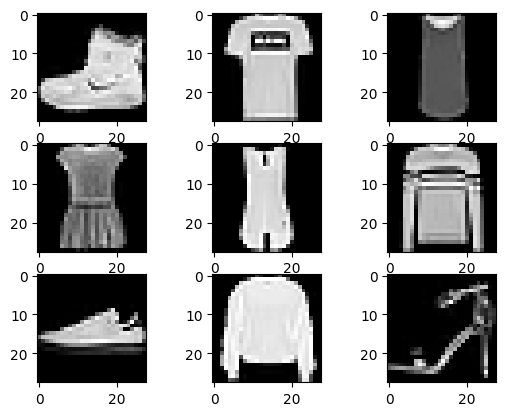

In [5]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap='gray')
plt.show()

<hr>

## Step 2: Image Feature Extraction

<p><i>Feature extraction</i> adalah suatu metode untuk membuat gambar dapat dibaca oleh mesin dengan cara mentransformasi bentukan gamnbar menjadi matriks dimana satu sel melambangkan satu piksel. Matriks yang berisi informasi gambar di pixel, lalu di proses lebih lanjut dan sedemikian rupa agar pola dapat ditemukan yang membolehkan mesin untuk melakukan perhitungan lebih lanjut. </p>

<p>Fitur-fitur dari gambar antara lain:

<ol>
    <li> Contoh fitur alami:
        <ul>
            <li>Kecerahan</li>
            <li>Tepi</li>
        </ul>    
    </li>
    <li> Contoh fitur buatan:
        <ul>
            <li>Histogram</li>
            <li>Graylevel</li>
        </ul>    
    </li>

Bentuk citra (28, 28) dengan ukuran (W x H): 784
Hanya terdapat satu channel
Ukuran fitur channel (Vektor fitur): (1, 784)
Ukuran fitur binary (Threshold):  (1, 784)


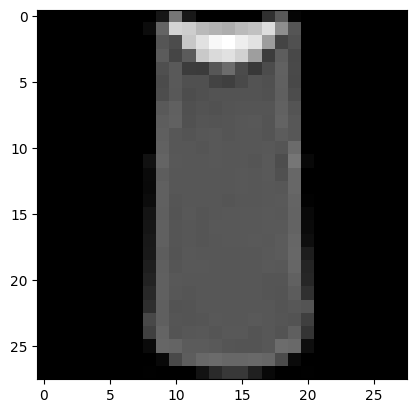

In [6]:
# Fitur-fitur dangkal gambar
citra = train_X[2]
plt.imshow(citra, cmap='gray')
print("Bentuk citra", citra.shape, "dengan ukuran (W x H):", citra.size)
print("Hanya terdapat satu channel")
print("Ukuran fitur channel (Vektor fitur):", citra.reshape(1, -1).shape)
(treshold, img_bin) = cv2.threshold(citra, 127, 255, cv2.THRESH_BINARY)
print("Ukuran fitur binary (Threshold): ", (img_bin.reshape(1, -1).shape))

<p>Karena citra hanya memiliki satu channel warna, konversi ke RGB ataupun HSV akan gagal.
</p><br><br><p>Pembuatan histogram pun hanya dilakukan untuk satu channel warna tersebut.</p>

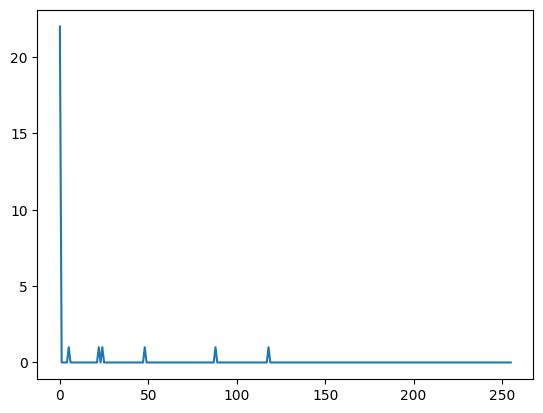

In [37]:
hist_citra = cv2.calcHist(citra, [0], None, [256], [0, 256])
plt.plot(hist_citra)

<hr>

## Step 3: PCA

<p>PCA diaplikasikan kepada array X (data training berisi gambar-gambar dengan ukuran [0, 768] x 60000 gambar) untuk mengurangi dimensi dari semua gambar </p>

#### PCA 1. Standardization

In [60]:

# Standardisasi : Mengubah mean X menjadi 0 dan varian menjadi 1
X = train_X.reshape(-1, train_X.shape[1]*train_X.shape[2])
X_scaling = StandardScaler().fit_transform(X)
print("Ukuran data train", train_X.shape)
print("Ukuran data train (fitur)", X.shape)
print("Ukuran data train (standardisasi):", X_scaling.shape)

Ukuran data train (60000, 28, 28)
Ukuran data train (fitur) (60000, 784)
Ukuran data train (standardisasi): (60000, 784)


#### PCA 2. Transformation

In [8]:
# PCA untuk visualisasi, jumlah komponen terbaik yang digunakan untuk visualisasi adalah 2 atau 3 untuk 3D
komponen_visualisasi = 2

pca = PCA(komponen_visualisasi)
projected = pca.fit_transform(X_scaling)
print(projected.shape)

(60000, 2)


#### PCA 3. Visualization

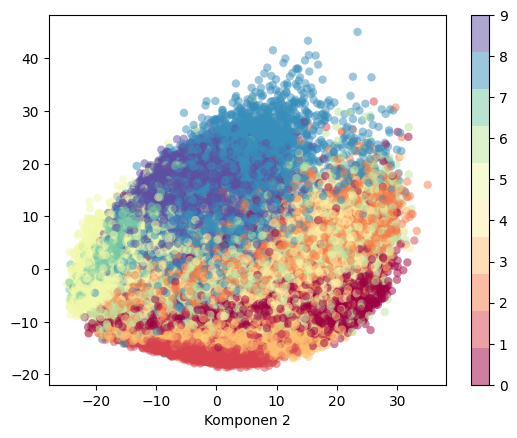

In [40]:
plt.scatter(projected[:,0], projected[:,1], c=train_y, edgecolor="none", alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Komponen 1')
plt.xlabel('Komponen 2')
plt.colorbar()
plt.show()

#### PCA 4. Grafik Kumulatif Varian 

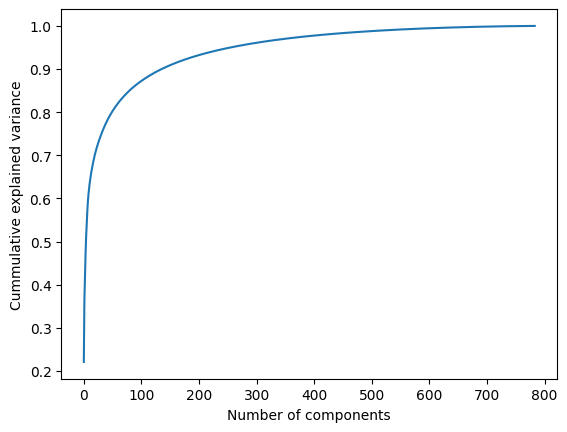

In [87]:
pca = PCA().fit(X_scaling)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained variance')
plt.show()

#### PCA 5. Applying PCA

In [83]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)


Pada praktikum ini, Component yang saya masukkan ke <code>class PCA</code> bukanlah nilai integer, yang akan melambangkan jumlah komponen secara langsung, tapi saya memasukkan nilai float 0 - 1 yang akan menginstruksikan PCA untuk menentukan banyaknya component secara mandiri tergantung dengan input 0 - 1 yang menjadi variance nya. Dalam contoh ini saya menggunakan 0.95 yang berarti saya menginstruksikan PCA untuk memilih banyak komponen yang mewakilkan 95% dari varians

In [84]:
print('Dimensi data setelah PCA: ', X_pca.shape)
approximation = pca.inverse_transform(X_pca)


Dimensi data setelah PCA:  (60000, 187)


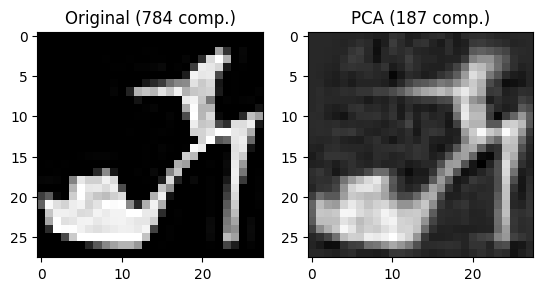

In [85]:
sample_image = 9

f, axarr = plt.subplots(1,2) 
plt.title('PCA image')
axarr[0].imshow(train_X[sample_image].reshape(train_X.shape[1], train_X.shape[2]), cmap=plt.get_cmap('gray'))
axarr[0].set_title('Original (784 comp.)')
axarr[1].imshow(approximation[sample_image].reshape(train_X.shape[1], train_X.shape[2]), cmap=plt.get_cmap('gray'))
axarr[1].set_title(f'PCA ({str(X_pca.shape[1])} comp.)',)


plt.show()

<hr>

## Step 4: Clustering

In [98]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

<function matplotlib.pyplot.show(close=None, block=None)>

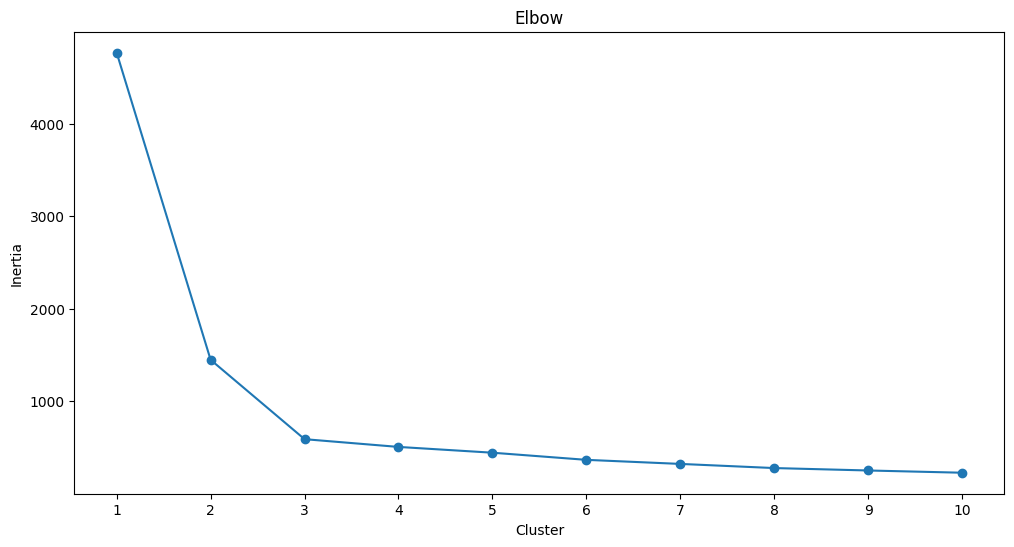

In [96]:
X, y  = make_blobs(n_samples=300, cluster_std=1, random_state=12)

inertias = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.title('Elbow')
plt.xticks(list(range(1, 11)))
plt.show

C:\Users\nicho\AppData\Local\Temp\ipykernel_19000\3884706724.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap="veridis")


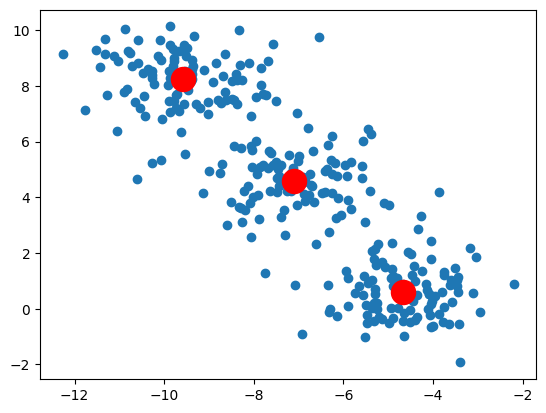

In [105]:
X, y  = make_blobs(n_samples=300, cluster_std=1, random_state=12)
kmeans =KMeans(n_clusters=3)
kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], cmap="veridis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()



<hr>

## Step 5: Karakteristik cluster

In [154]:
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
clusters = []
for key, value in mydict.items():
    clusters.append([key,value])

In [155]:

clusters

[[0,
  array([  5,   6,   8,  11,  15,  17,  18,  24,  25,  28,  31,  32,  34,
          37,  42,  46,  47,  53,  54,  55,  57,  71,  75,  77,  78,  80,
          84,  93,  96, 103, 105, 111, 112, 113, 114, 115, 116, 120, 122,
         126, 127, 129, 136, 137, 140, 141, 142, 143, 145, 148, 153, 155,
         156, 160, 161, 162, 163, 164, 166, 168, 170, 172, 173, 174, 176,
         179, 188, 191, 193, 194, 197, 198, 200, 205, 206, 210, 211, 213,
         218, 221, 226, 232, 236, 240, 248, 251, 260, 263, 268, 269, 274,
         286, 290, 291, 292, 293, 296, 297, 298, 299], dtype=int64)],
 [1,
  array([  0,   2,   3,   4,  20,  22,  23,  26,  27,  29,  30,  39,  41,
          43,  44,  48,  52,  59,  61,  62,  63,  66,  68,  69,  72,  79,
          81,  85,  86,  87,  89,  91,  95,  97,  98, 100, 108, 118, 119,
         125, 133, 134, 139, 144, 146, 152, 154, 165, 169, 171, 175, 177,
         181, 182, 184, 185, 189, 190, 192, 195, 196, 199, 201, 204, 207,
         208, 214, 215, 216, 219

In [176]:
clusters[2][1][:9]

array([ 1,  7,  9, 10, 12, 13, 14, 16, 19], dtype=int64)

In [192]:
print("Empat contoh cluster 1: ", clusters[0][1][:4])

Dua contoh cluster 1:  [ 5  6  8 11]


Text(0.5, 1.0, 'Sample 8 (Cluster 1)')

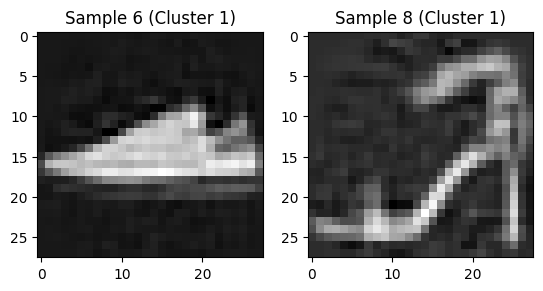

In [196]:
f, axarr = plt.subplots(1,2) 
plt.title('PCA image')
axarr[0].imshow(approximation[6].reshape(train_X.shape[1], train_X.shape[2]), cmap=plt.get_cmap('gray'))
axarr[0].set_title('Sample 6 (Cluster 1)')
axarr[1].imshow(approximation[8].reshape(train_X.shape[1], train_X.shape[2]), cmap=plt.get_cmap('gray'))
axarr[1].set_title(f'Sample 8 (Cluster 1)',)

In [195]:
print("Empat contoh cluster 2: ", clusters[1][1][:4])

Empat contoh cluster 2:  [0 2 3 4]


Text(0.5, 1.0, 'Sample 4 (Cluster 2)')

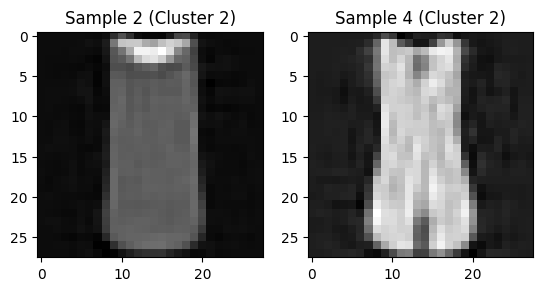

In [197]:
f, axarr = plt.subplots(1,2) 
plt.title('PCA image')
axarr[0].imshow(approximation[2].reshape(train_X.shape[1], train_X.shape[2]), cmap=plt.get_cmap('gray'))
axarr[0].set_title('Sample 2 (Cluster 2)')
axarr[1].imshow(approximation[4].reshape(train_X.shape[1], train_X.shape[2]), cmap=plt.get_cmap('gray'))
axarr[1].set_title(f'Sample 4 (Cluster 2)',)

In [199]:
print("Empat contoh cluster 3: ", clusters[2][1][:4])

Empat contoh cluster 3:  [ 1  7  9 10]


Text(0.5, 1.0, 'Sample 9 (Cluster 3)')

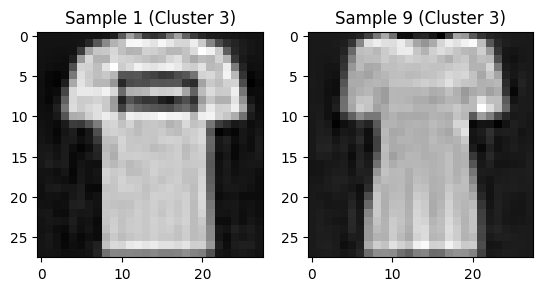

In [205]:
f, axarr = plt.subplots(1,2) 
plt.title('PCA image')
axarr[0].imshow(approximation[1].reshape(train_X.shape[1], train_X.shape[2]), cmap=plt.get_cmap('gray'))
axarr[0].set_title('Sample 1 (Cluster 3)')
axarr[1].imshow(approximation[10].reshape(train_X.shape[1], train_X.shape[2]), cmap=plt.get_cmap('gray'))
axarr[1].set_title(f'Sample 9 (Cluster 3)',)

### Deskripsi Cluster
Dengan mengiterasikan setiap item dengan clusternya dan mengumpulkannya jadi satu, diketahui bahwa:<br>
<ul>
    <li> Terdapat tiga cluster</li>
    <li> Setiap cluster memiliki rata-rata 270 item</li>
    <li> Terlihat setiap cluster membedakan sample terhadap bentukannya </li>
</ul>


### Karakteristik setiap kluster
<ol>
    <li> Cluster 1 menggolongkan sepatu dan heels </li>
    <li> Cluster 2 menggolongkan pakaian dengan bentukan persegi panjang</li>
    <li> Cluster 3 belum terlalu jelas, namun tampaknya pakaian kaos dan dress kecil </li>
</ol>
<hr>


## Kesimpulan akhir

Dari praktikum hari ini, telah dilakukan penggolongan gambar berdasarkan fitur di gambar tersebut, yang diproses dengan PCA. Kekurangan dari praktikum ini adalah optimisasi dari preprocessing seperti tuning pada standardscaler atau PCA karena masih banyak gambar yang hadir bukan pada clusternya